# 00 settings

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy.stats import pearsonr
from scipy import stats
from scipy import signal
import pymannkendall as mk

# settings
duration = 10

bs_start_idx = [2306,2338,2369,2418,2452,2485,2546,2596,2687,2696,2765,2915,3014,3071,3130,3283,3402,3581,3662]
bs_end_idx = [2330,2357,2384,2436,2474,2500,2596,2650,2696,2729,2792,2936,3021,3081,3140,3291,3410,3590,3670]
ane_start_idx = [2288,2330,2357,2384,2436,2474,2500,2650,2729,2792,2936,3021,3081,3140,3242,3291,3410,3590,3670]
ane_end_idx = [2306,2339,2369,2418,2452,2485,2546,2687,2765,2915,3014,3071,3130,3236,3283,3402,3581,3662,3788]

# path
res_path = "xxxx/data_analysis_res_m010/"

print("res_path:", res_path)

res_path: xxxx/data_analysis_res_m010/


# 01 load data

denoised_data: (17655, 9676)


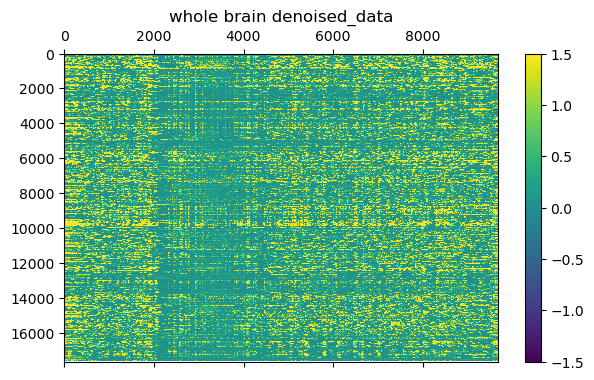

In [13]:
'''
load data
'''
denoised_data = np.load(res_path + "records/neuron_denoised_records_whole_brain.npy")
print("denoised_data:", denoised_data.shape)

fig,ax = plt.subplots(figsize=(7,4), dpi=100,facecolor="w")
caxes = ax.matshow(denoised_data, vmin = -1.5, vmax = 1.5, cmap = "viridis", aspect = "auto")
fig.colorbar(caxes)
plt.title("whole brain denoised_data")
plt.show()

# 02 compare duration and neuron number

burst_time_x: 19
--------------- time_idx: 0 -- 2306 2330 ----------------
active_neurons: 3050
--------------- time_idx: 1 -- 2338 2357 ----------------
active_neurons: 2482
--------------- time_idx: 2 -- 2369 2384 ----------------
active_neurons: 2135
--------------- time_idx: 3 -- 2418 2436 ----------------
active_neurons: 3775
--------------- time_idx: 4 -- 2452 2474 ----------------
active_neurons: 4193
--------------- time_idx: 5 -- 2485 2500 ----------------
active_neurons: 3359
--------------- time_idx: 6 -- 2546 2596 ----------------
active_neurons: 4888
--------------- time_idx: 7 -- 2596 2650 ----------------
active_neurons: 4123
--------------- time_idx: 8 -- 2687 2696 ----------------
active_neurons: 3582
--------------- time_idx: 9 -- 2696 2729 ----------------
active_neurons: 3625
--------------- time_idx: 10 -- 2765 2792 ----------------
active_neurons: 3950
--------------- time_idx: 11 -- 2915 2936 ----------------
active_neurons: 6578
--------------- time_idx: 12 -- 3

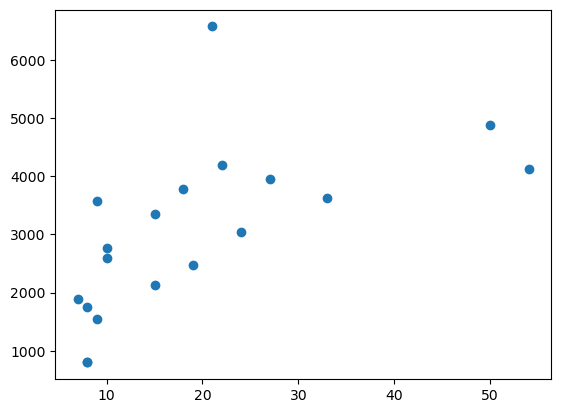

In [16]:
'''
active neurons in each burst period
'''

name = "burst"  
thre  = 0.05

burst_time_x = [bs_end_idx[i] - bs_start_idx[i] for i in range(len(bs_start_idx))]
print("burst_time_x:", len(burst_time_x))

bs_active_neuron_numbers = []
for time_idx in range(len(bs_end_idx)):
    start, end = bs_start_idx[time_idx], bs_end_idx[time_idx]
    print("--------------- time_idx:", time_idx, "--", start, end, "----------------")
    active_neurons = []
    for i in range(len(denoised_data)):
        curr_part = denoised_data[i, start : end]
        neuron_avg = np.mean(denoised_data[i])
        stat, p_value = stats.mannwhitneyu(curr_part, [neuron_avg] * len(curr_part), alternative='two-sided')
        if p_value < thre and np.mean(curr_part) > neuron_avg:
            active_neurons.append(i)
    np.save(res_path + "neurons/all_active_neurons_in_" + name + "_whole_period_" + str(time_idx) + ".npy", active_neurons)
    print("active_neurons:", len(active_neurons))
    bs_active_neuron_numbers.append(len(active_neurons))
print("bs_active_neuron_numbers:", len(bs_active_neuron_numbers))
plt.scatter(burst_time_x, bs_active_neuron_numbers)
plt.show()

supp_time_x: 19
--------------- time_idx: 0 -- 2288 2306 ----------------
active_neurons: 1038
--------------- time_idx: 1 -- 2330 2339 ----------------
active_neurons: 2334
--------------- time_idx: 2 -- 2357 2369 ----------------
active_neurons: 1464
--------------- time_idx: 3 -- 2384 2418 ----------------
active_neurons: 826
--------------- time_idx: 4 -- 2436 2452 ----------------
active_neurons: 1562
--------------- time_idx: 5 -- 2474 2485 ----------------
active_neurons: 1907
--------------- time_idx: 6 -- 2500 2546 ----------------
active_neurons: 692
--------------- time_idx: 7 -- 2650 2687 ----------------
active_neurons: 696
--------------- time_idx: 8 -- 2729 2765 ----------------
active_neurons: 790
--------------- time_idx: 9 -- 2792 2915 ----------------
active_neurons: 675
--------------- time_idx: 10 -- 2936 3014 ----------------
active_neurons: 529
--------------- time_idx: 11 -- 3021 3071 ----------------
active_neurons: 588
--------------- time_idx: 12 -- 3081 3130

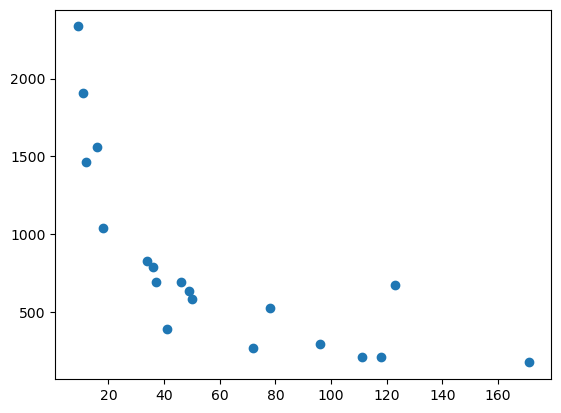

In [17]:
'''
active neurons in each supp period
'''

name = "supp"   
thre = 0.05

supp_time_x = [ane_end_idx[i] - ane_start_idx[i] for i in range(len(ane_start_idx))]
print("supp_time_x:", len(supp_time_x))

ane_active_neuron_numbers = []
for time_idx in range(len(ane_end_idx)):
    start, end = ane_start_idx[time_idx], ane_end_idx[time_idx]
    print("--------------- time_idx:", time_idx, "--", start, end, "----------------")
    active_neurons = []
    for i in range(len(denoised_data)):
        curr_part = denoised_data[i, start : end]
        neuron_avg = np.mean(denoised_data[i])
        stat, p_value = stats.mannwhitneyu(curr_part, [neuron_avg] * len(curr_part), alternative='two-sided')
        if p_value < thre and np.mean(curr_part) > neuron_avg:
            active_neurons.append(i)
    np.save(res_path + "neurons/all_active_neurons_in_" + name + "_whole_period_" + str(time_idx) + ".npy", active_neurons)
    print("active_neurons:", len(active_neurons))
    ane_active_neuron_numbers.append(len(active_neurons))
print("ane_active_neuron_numbers:", len(ane_active_neuron_numbers))
plt.scatter(supp_time_x, ane_active_neuron_numbers)
plt.show()

burst_number_y: 19
supp_number_y: 19
burst coeff: [ 638.59575726 1813.08082678]  -- R2: 0.3707753586936843
supp coeff : [ -96.63240666 1378.69134059]  -- R2: 0.5299207416199775


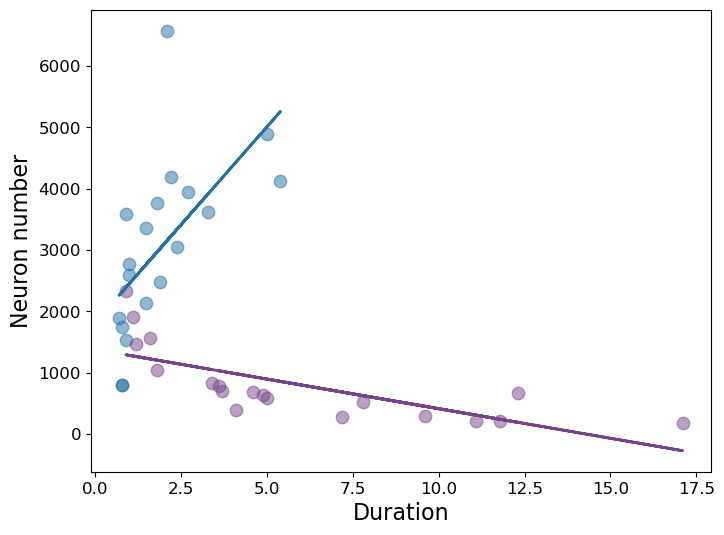

In [11]:
'''
duration vs numbers
'''

burst_number_y = []
for time_idx in range(len(bs_start_idx)): 
    select_data_ids = np.load(res_path + "neurons/all_active_neurons_in_burst_whole_period_" + str(time_idx) + ".npy")
    burst_number_y.append(len(select_data_ids))
print("burst_number_y:", len(burst_number_y))
    
supp_number_y = []
for time_idx in range(len(ane_start_idx)): 
    select_data_ids = np.load(res_path + "neurons/all_active_neurons_in_supp_whole_period_" + str(time_idx) + ".npy")
    supp_number_y.append(len(select_data_ids))
print("supp_number_y:", len(supp_number_y))

'''
fit
'''
burst_time_x = [i/10 for i in burst_time_x]
supp_time_x = [i/10 for i in supp_time_x]

coeff = np.polyfit(burst_time_x, burst_number_y, 1)
p_burst = np.poly1d(coeff)
corr = np.corrcoef(burst_number_y, p_burst(burst_time_x))[0,1]
print("burst coeff:", coeff, " -- R2:", corr ** 2)

coeff = np.polyfit(supp_time_x, supp_number_y, 1)
p_supp = np.poly1d(coeff)
corr = np.corrcoef(supp_number_y, p_supp(supp_time_x))[0,1]
print("supp coeff :", coeff, " -- R2:", corr ** 2)

'''
plot
'''
fig,ax = plt.subplots(figsize=(8,6),dpi=100,facecolor="w")
plt.scatter(burst_time_x, burst_number_y, s = 80, c = "#2471A3", alpha = 0.5)
plt.plot(burst_time_x, p_burst(burst_time_x), color = "#2471A3", linewidth = 2)
plt.scatter(supp_time_x, supp_number_y, s = 80, c = "#76448A", alpha = 0.5)
plt.plot(supp_time_x, p_supp(supp_time_x), color = "#76448A", linewidth = 2)
plt.xlabel("Duration", fontsize = 16)
plt.ylabel("Neuron number", fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.savefig(res_path + "neurons/burst_supp_time_length_vs_neuron_number.png", bbox_inches='tight')
plt.savefig(res_path + "neurons/burst_supp_time_length_vs_neuron_number.pdf", bbox_inches='tight')
plt.show()
